In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Датасет

In [ ]:
data = pd.read_csv("https://github.com/artbug-nova/neural_network/raw/main/dataset.csv", delimiter=";")

### Анализ датасета

In [ ]:
data.shape

(100000, 9)

In [ ]:
data.head()

X           Y           Z          Q0         Q1          Q2  \
0   964.641745 -468.266848  984.552780  -25.227799  73.243783  -12.828289   
1  -115.905121  130.217931  434.065547  109.309104 -40.503589  110.672819   
2  -393.289964  381.512428 -560.098182  134.749852 -23.277407    2.368699   
3  -149.915844   92.802840  278.489373 -182.667866  36.744918   90.973677   
4 -1176.227205  125.086343 -215.689303  175.533503   0.078223  -19.230722   

           Q3         Q4          Q5  
0  168.408525 -32.618631 -299.510523  
1  -35.833970 -99.880439  165.238082  
2  338.804545 -14.940896 -152.923864  
3  287.099427  51.251698 -315.395719  
4 -149.366842  34.401210  312.055617

In [ ]:
data.describe()

X              Y              Z             Q0  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean      -20.953098       1.941565     476.057720       0.285944   
std       605.309957     588.193505     587.905738     107.072354   
min     -1519.514414   -1518.153464    -765.414094    -184.998113   
25%      -352.709141    -293.354622      57.055588     -92.683236   
50%       -10.250699       0.636227     416.175812       0.468672   
75%       295.065731     301.792446     846.101000      93.165364   
max      1521.792481    1517.187426    1743.422282     184.992911   

                  Q1             Q2             Q3             Q4  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.026249      -0.177645      -0.456190       0.259969   
std        37.406032      86.727803     202.086413      72.202621   
min       -44.998899    -149.996154    -349.997254    -124.999390   
25%       -12.176763     -75.260497    -175.156038     -62.119363   
50%        20.024950       0.227038      -0.608823       0.358204   
75%        52.321923      75.110127     173.287000      63.039092   
max        84.999476     149.999321     349.999020     124.997046   

                  Q5  
count  100000.000000  
mean       -0.010415  
std       202.407335  
min      -349.985232  
25%      -175.975486  
50%         0.466212  
75%       175.389523  
max       349.991802

In [ ]:
feature_columns = ["X", "Y", "Z"]
target_columns = ["Q0", "Q1", "Q2", "Q3", "Q4", "Q5"]

In [ ]:
pca = PCA(n_components=3)
idx_subset = np.random.choice(data.shape[0], replace=False, size=10000)
data_subset = data.loc[idx_subset]

pca_result = pca.fit_transform(data_subset[feature_columns].values)

print("Explained variation per principal component: {}".format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.35355209 0.3273543  0.31909361]


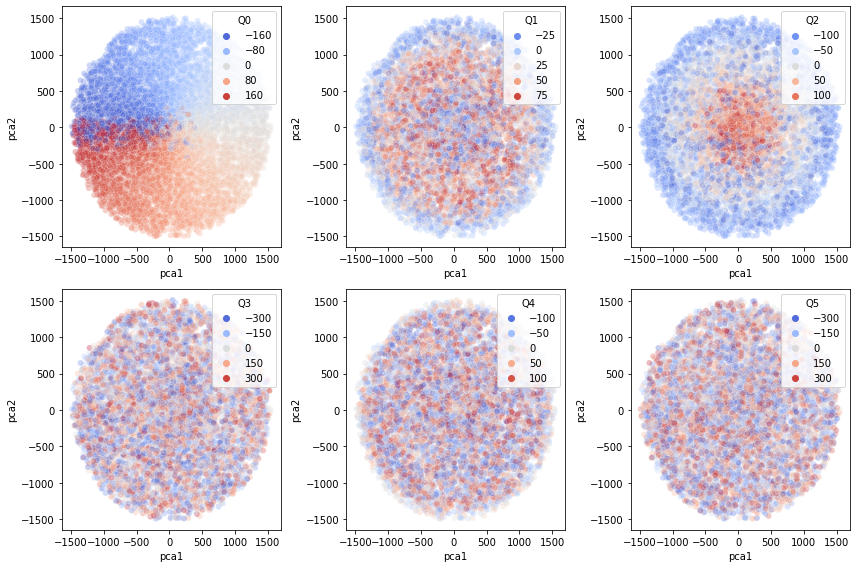

In [ ]:
data_subset["pca1"] = pca_result[:,0]
data_subset["pca2"] = pca_result[:,1] 
data_subset["pca3"] = pca_result[:,2]

fig, axes = plt.subplots(figsize=(12, 8), ncols=3, nrows=2)

for q, ax in zip(target_columns, axes.flat):
    sns.scatterplot(
        x="pca1", y="pca2",
        hue=q,
        data=data_subset,
        palette=sns.color_palette("coolwarm", as_cmap=True), 
        alpha=0.3,
        ax=ax
    )

fig.tight_layout()

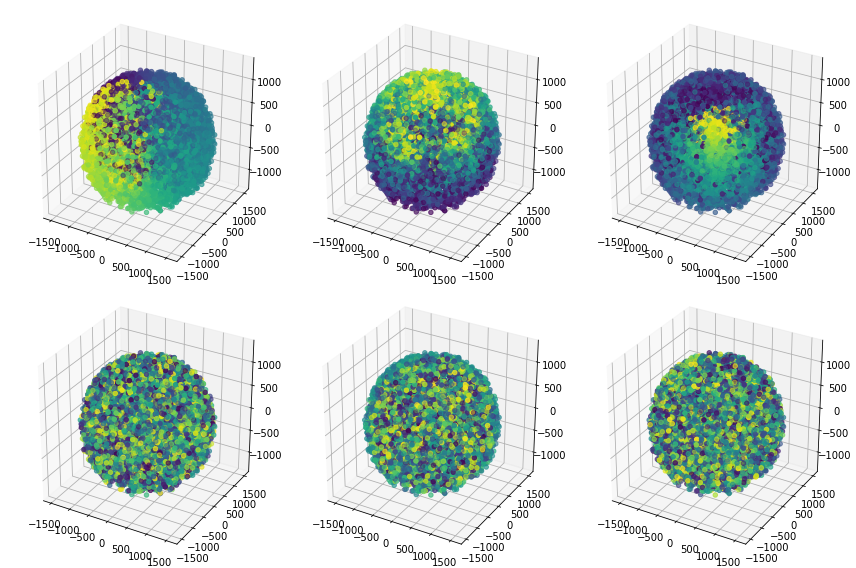

In [ ]:
fig, axes = plt.subplots(figsize=(12, 8), ncols=3, nrows=2,
                         subplot_kw=dict(projection="3d"))

for q, ax in zip(target_columns, axes.flat):
    ax.scatter(
        xs=data_subset["pca1"], 
        ys=data_subset["pca2"], 
        zs=data_subset["pca3"], 
        c=data_subset[q],
    )

fig.tight_layout()

In [ ]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=300, learning_rate="auto", init="random")
tsne_results = tsne.fit_transform(data_subset)

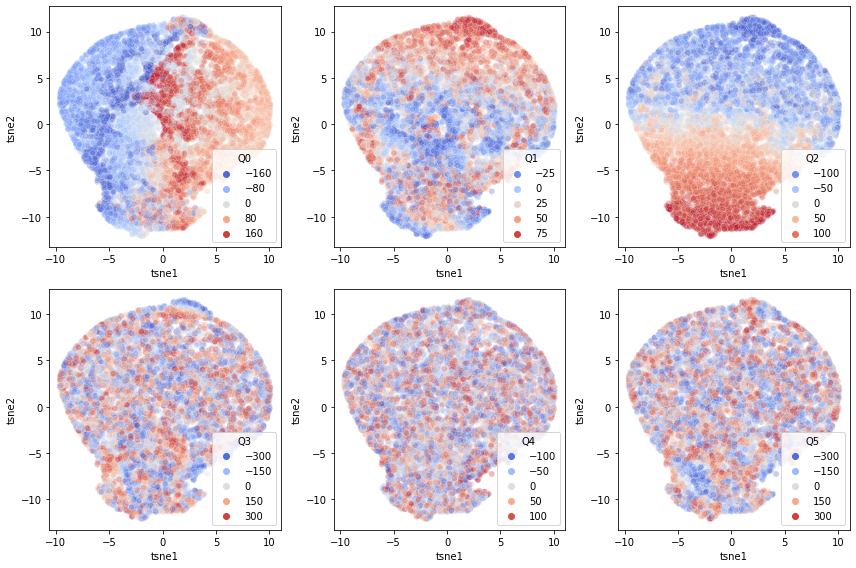

In [ ]:
data_subset["tsne1"] = tsne_results[:, 0]
data_subset["tsne2"] = tsne_results[:, 1]

fig, axes = plt.subplots(figsize=(12, 8), ncols=3, nrows=2)

for q, ax in zip(target_columns, axes.flat):
    sns.scatterplot(
        x="tsne1", y="tsne2",
        hue=q,
        data=data_subset,
        palette=sns.color_palette("coolwarm", as_cmap=True), 
        alpha=0.3,
        ax=ax
    )

fig.tight_layout()

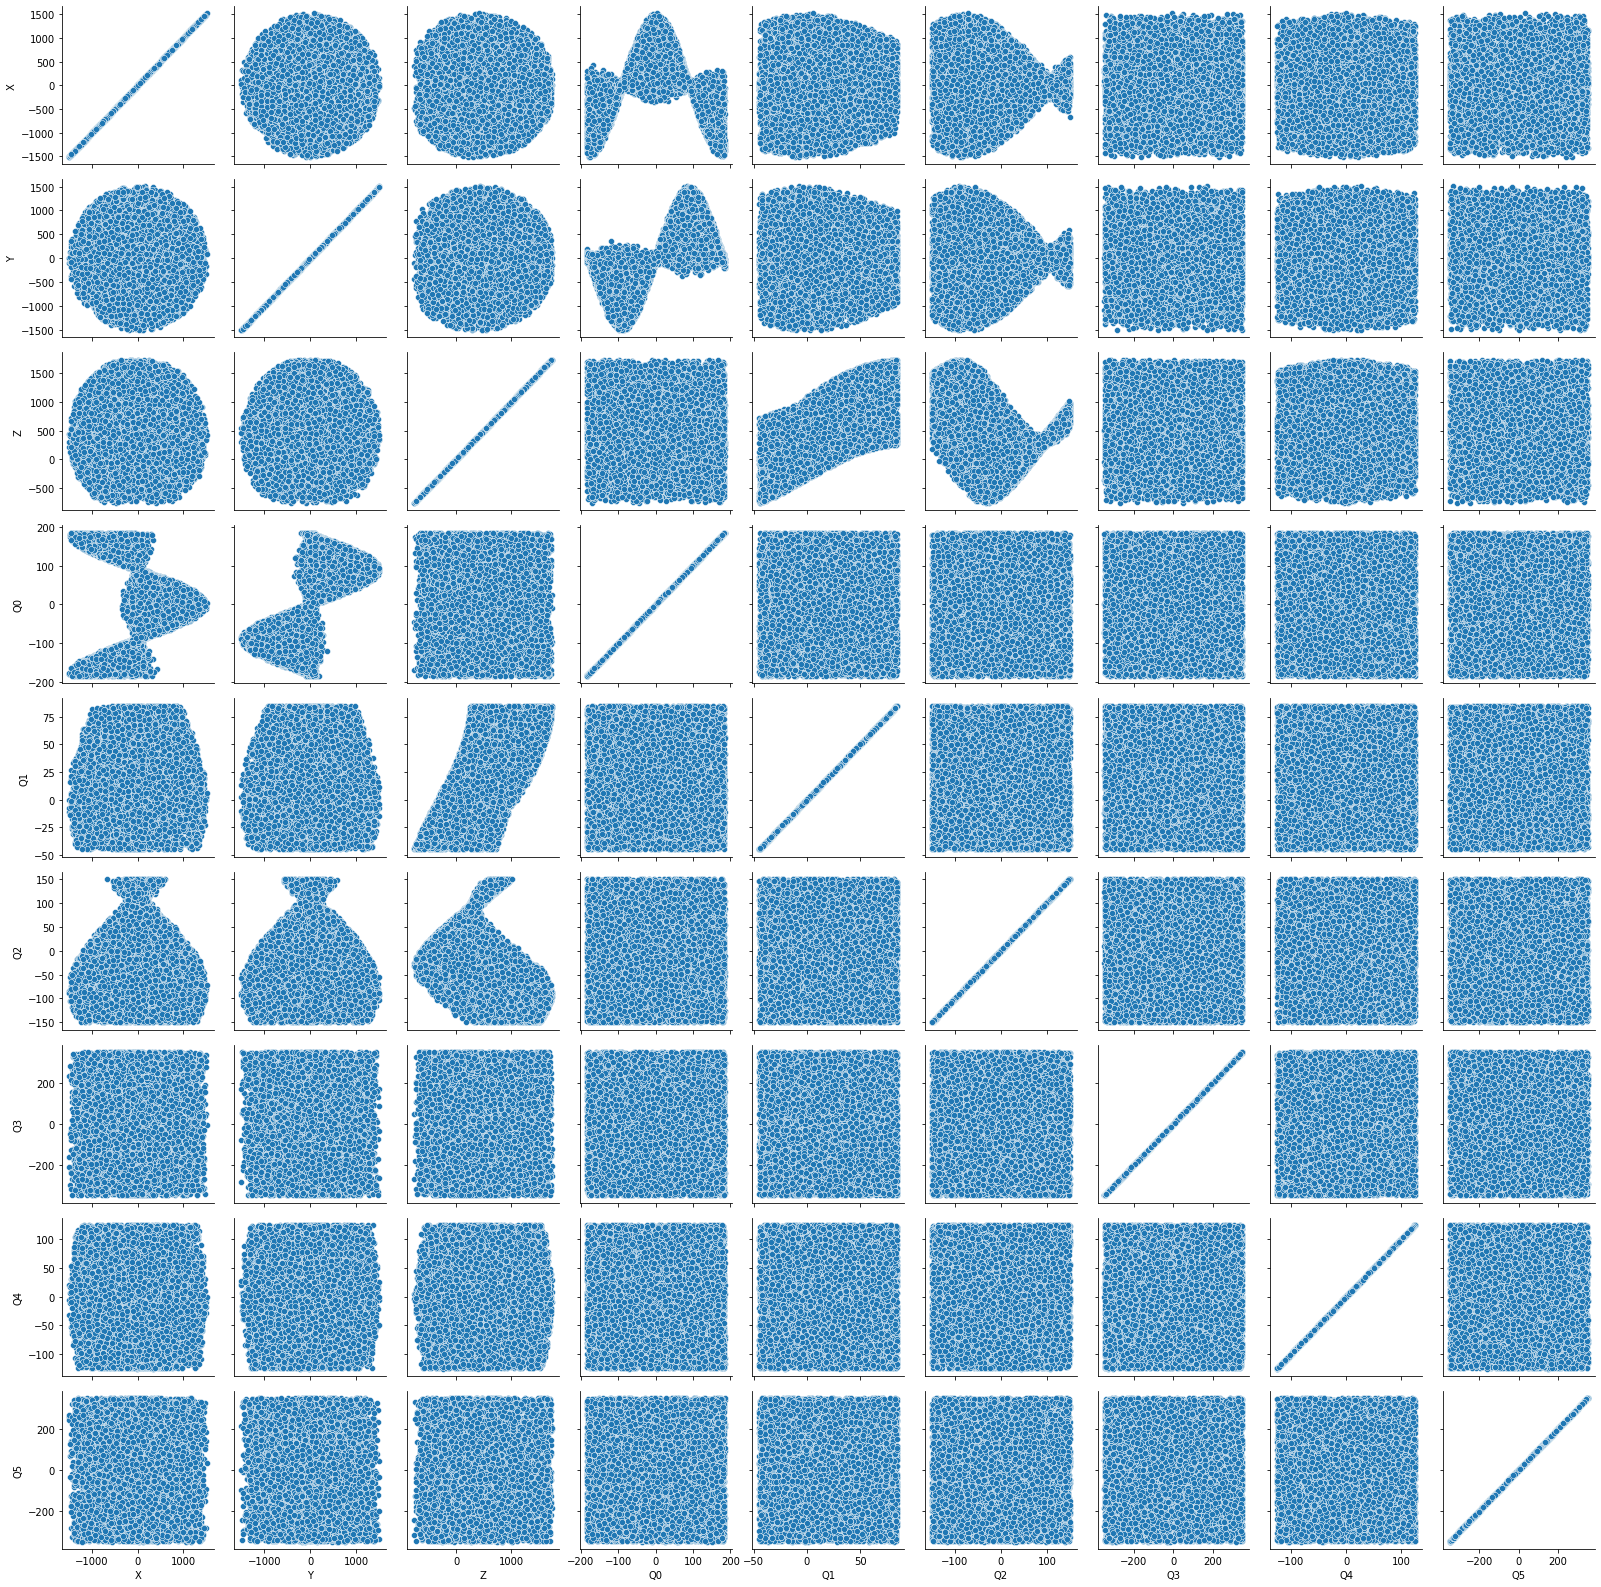

In [ ]:
data_subset_for_grid = data.loc[idx_subset]

g = sns.PairGrid(data_subset_for_grid)
g.map(sns.scatterplot)

### Препроцессинг

In [ ]:
dups = data.duplicated(subset=feature_columns)

In [ ]:
dups.shape

(100000,)

In [ ]:
data = data[~dups]

In [ ]:
data.shape

(100000, 9)

In [ ]:
X = data.loc[:, feature_columns]
Y = data.loc[:, target_columns]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, shuffle=1, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((85000, 3), (85000, 6))

In [ ]:
X_test.shape, Y_test.shape

((15000, 3), (15000, 6))

In [ ]:
X_train.head()

X            Y           Z
71584   163.975959  1148.844872  779.415151
98962   269.115942 -1343.769203  370.739090
74509  1103.284759  -724.025598  920.571630
86798   241.014342   -61.762706  715.044522
54930   759.635767    82.969788  136.344081

In [ ]:
scaler = MinMaxScaler(feature_range=(-1, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.10673174,  0.75729741,  0.23183246],
       [ 0.1759003 , -0.88509741, -0.09404203],
       [ 0.72467586, -0.47674552,  0.34438932],
       ...,
       [ 0.01660385,  0.1075502 ,  0.10744157],
       [-0.2453109 , -0.87504041, -0.38665413],
       [-0.20334215, -0.11600829,  0.19093513]])

### Обучение сети

In [ ]:
def get_model(n_inputs, n_outputs, learning_rate, hidden_layer_count):
    """
    n_inputs - количество входов
    n_outputs - количество выходов
    learning_rate - скорость обучения
    hidden_layer_count - количество нейронов скрытого слоя
    """
    model = Sequential([
        Dense(20, input_dim=n_inputs, kernel_initializer="he_uniform", activation="relu"),
        Dense(hidden_layer_count, activation="relu"),
        Dense(n_outputs, activation="relu"),
    ])
    model.compile(
        optimizer=tf.optimizers.Adam(
            learning_rate=learning_rate,
            beta_1=0.9,
            beta_2=0.999,
            epsilon=1e-07,
            amsgrad=False,
            name="Adam"
        ),
        loss="mae",
        metrics=["accuracy"],
    )
    return model

In [ ]:
def train(learning_rate, epochs, hidden_layer_count, verbose=1):
    """
    learning_rate - скорость обучения
    epochs - количество итераций
    hidden_layer_count - количество нейронов скрытого слоя
    """
    # Build the model
    model = get_model(n_inputs=len(feature_columns), n_outputs=len(target_columns),
                      learning_rate=learning_rate, hidden_layer_count=hidden_layer_count)

    # Train the model
    history = model.fit(
        x=X_train,
        y=Y_train,
        epochs=epochs,
        verbose=verbose,
        validation_data=(X_test, Y_test)
    )

    loss = history.history["loss"][-1]
    accuracy = history.history["accuracy"][-1]

    if verbose == 0:
        print(f"loss: {loss} - accuracy: {accuracy}")

    return model, history, accuracy, loss

In [ ]:
model, history, base_accuracy, base_loss = train(learning_rate=0.001, epochs=50, hidden_layer_count=32)

Epoch 1/50
2657/2657 [==============================] - 8s 3ms/step - loss: 95.3111 - accuracy: 0.2314 - val_loss: 91.7367 - val_accuracy: 0.2571
Epoch 2/50
2657/2657 [==============================] - 7s 3ms/step - loss: 91.2236 - accuracy: 0.2618 - val_loss: 91.0385 - val_accuracy: 0.2608
Epoch 3/50
2657/2657 [==============================] - 10s 4ms/step - loss: 90.8124 - accuracy: 0.2605 - val_loss: 90.7637 - val_accuracy: 0.2612
Epoch 4/50
2657/2657 [==============================] - 8s 3ms/step - loss: 90.5950 - accuracy: 0.2625 - val_loss: 90.5915 - val_accuracy: 0.2639
Epoch 5/50
2657/2657 [==============================] - 7s 3ms/step - loss: 90.4525 - accuracy: 0.2644 - val_loss: 90.4802 - val_accuracy: 0.2654
Epoch 6/50
2657/2657 [==============================] - 7s 2ms/step - loss: 90.3510 - accuracy: 0.2650 - val_loss: 90.4011 - val_accuracy: 0.2647
Epoch 7/50
2657/2657 [==============================] - 7s 2ms/step - loss: 90.2548 - accuracy: 0.2656 - val_loss: 90.3128 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                672       
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 950
Trainable params: 950
Non-trainable params: 0
_________________________________________________________________


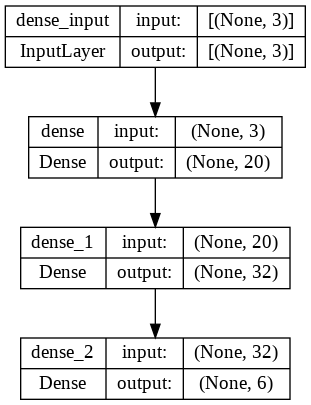

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
base_accuracy

0.2686588168144226

In [ ]:
# Save the model to disk
# base_model.save_weights("model.h5")

# Load the model from disk later using:
# base_model.load_weights("model.h5")

# Evaluate the model
model.evaluate(
    X_test,
    Y_test
)

# Predict on the first 5 tests
predictions = model.predict(X_test[:5])

# Print our model's predictions
print(predictions)

# Check our predictions against the ground truths
print(Y_test[:5])

1/1 [==============================] - 0s 96ms/step
[[111.58665   38.95834    0.         0.         0.         0.      ]
 [ 49.96849   11.110489   0.         0.         0.         0.      ]
 [ 63.157974  10.632084 142.11006    0.         0.         0.      ]
 [ 80.00118   51.342697   0.         0.         0.         0.      ]
 [ 59.08367   84.82073    0.         0.         0.         0.      ]]
               Q0         Q1          Q2          Q3         Q4          Q5
75721  110.735718  -4.359409 -132.095340 -303.634690  23.294755 -184.341445
80184   48.464594  -9.056802 -129.333489   50.395944  47.911461  -65.202715
19864  -95.122414  49.990456  138.991244  -53.574418  85.732990  160.620938
76699   83.758040  56.760535  -61.192589 -344.451730 -65.335157  -56.074314
92991   99.773533  77.945159 -104.791376   48.952619  -6.947942   86.393221


In [ ]:
Y_pred = model.predict(X_test)

training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Get training and test accuracy histories
training_acc = history.history["accuracy"]
test_acc = history.history["val_accuracy"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

469/469 [==============================] - 1s 1ms/step


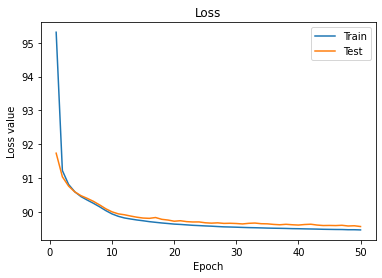

In [ ]:
# Visualize loss history
plt.figure()
plt.title("Loss")
plt.plot(epoch_count, training_loss)
plt.plot(epoch_count, test_loss)
plt.legend(["Train", "Test"])
plt.xlabel("Epoch")
plt.ylabel("Loss value")
plt.show()

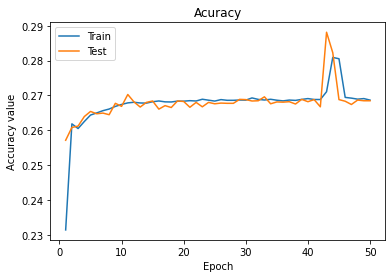

In [ ]:
# Visualize accuracy history
plt.figure()
plt.title("Acuracy")
plt.plot(epoch_count, training_acc)
plt.plot(epoch_count, test_acc)
plt.legend(["Train", "Test"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy value")
plt.show()